# Demo

Saving to: c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\ds2_dense\ds2_dense\gt_space.json
ModelSeries: loadJsonData()
loadLatestCheckpoint available files: [100, 11, 12, 16, 21, 22, 35, 45, 9]
loadLatestCheckpoint picked file: 100
latest checkpoint: 100.pth
[loadMode] Loaded weights from c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@60@2@720\runpod_oneshot_training2\checkpoints\100.pth
Found file: c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\presentation\demo\images\diabelli.png  (306854 bytes)
image.shape: (1, 1, 720, 720)


c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\util.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


Saved visualization → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\presentation\demo\preds


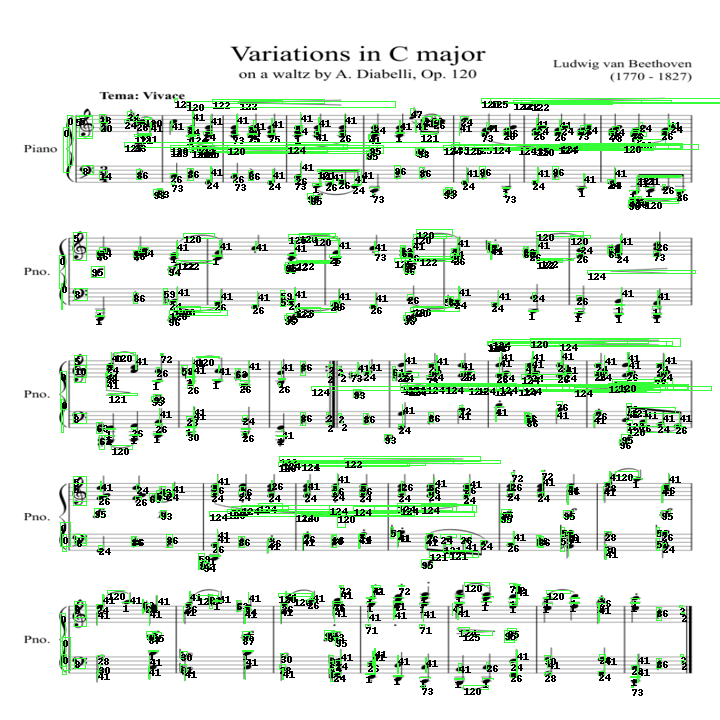

In [20]:
import util, os, pickle
import model as m
import ModelSeries as ms
import matplotlib.pyplot as plt 
import numpy as np
from torchsummary import summary
from importlib import reload
reload(util)

#renders prediction and stores output in demo/preds
#input image path is relative to demo directory in root
gt_df = util.DataExtractor().croppedData()
series = ms.ModelSeries(name = "runpod_oneshot_training2", gt_df = gt_df, mode="training")
cwd = os.getcwd()
x = util.demo(series, "diabelli.png", conf_thr=0.1 )


# Model Size

In [2]:
model = m.YOLOResNet().cpu()    # move to CPU
summary(model, (1, 720, 720), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 240, 240]           3,136
       BatchNorm2d-2         [-1, 64, 240, 240]             128
              ReLU-3         [-1, 64, 240, 240]               0
         MaxPool2d-4         [-1, 64, 120, 120]               0
            Conv2d-5         [-1, 64, 120, 120]          36,864
       BatchNorm2d-6         [-1, 64, 120, 120]             128
              ReLU-7         [-1, 64, 120, 120]               0
            Conv2d-8         [-1, 64, 120, 120]          36,864
       BatchNorm2d-9         [-1, 64, 120, 120]             128
             ReLU-10         [-1, 64, 120, 120]               0
       BasicBlock-11         [-1, 64, 120, 120]               0
           Conv2d-12         [-1, 64, 120, 120]          36,864
      BatchNorm2d-13         [-1, 64, 120, 120]             128
             ReLU-14         [-1, 64, 1

# Precision and Recall

In [3]:
filepath = os.path.join(os.getcwd(), "m_rec_prec_cls", "pr_curve20250906_094409.pkl")
with open(filepath, "rb") as f:
    pr_curve = pickle.load(f)

threshs = [0.015, 0.01625, 0.0175, 0.01875, 0.02, 0.04, 0.06, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

pr_ = [(threshs[i], pr_curve[i]) for i in range(len(threshs))]
pr_

[(0.015,
  (0.4593185593611165,
   0.41757976928788415,
   (25991.0000001, 36251.0000001, 30595.0000001),
   (tensor([0.5450, 0.2900, 0.2647, 0.3953, 0.4286, 0.5384, 0.3986, 0.3000, 0.6629,
            0.0000, 0.2322, 0.5714, 0.6818, 0.6761, 0.1875, 0.3333, 0.5833, 0.0000,
            0.3587, 0.0000, 0.1765, 0.5714, 0.2500, 0.6889, 0.7009, 0.0000, 0.7506,
            0.0000, 0.6016, 0.0000, 0.4492, 0.0000, 0.6047, 0.0000, 0.3043, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.4398, 0.1904, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.5144, 0.0000, 0.3214, 0.0000, 0.0000, 0.4286, 0.4713,
            0.0000, 0.5000, 0.0000, 0.0000, 0.4444, 0.1500, 0.0000, 0.5072, 0.0000,
            0.6205, 0.0000, 0.0000, 0.0000, 0.6940, 0.1818, 0.6938, 0.0000, 0.0000,
            0.1192, 0.0146, 0.0000, 0.0000, 0.5714, 0.2000, 0.0000, 0.0000, 0.7200,
            0.5000, 0.0000, 0.0000, 0.7192, 0.8000, 0.6611, 0.6193, 0.4817, 0.3409,
            0.5625, 0.5469, 0.0000, 0.3076, 0.6906, 0.

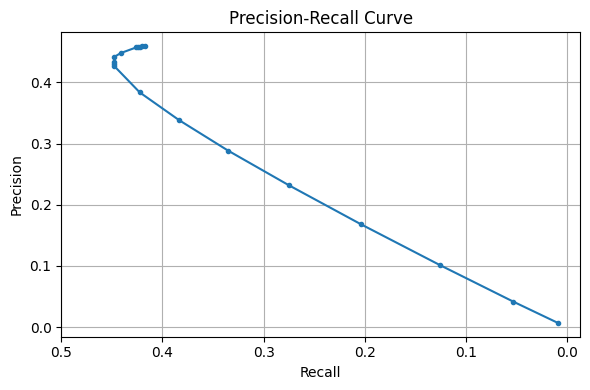

In [4]:
precision, recall = [x[1][0] for x in pr_], [x[1][1] for x in pr_]

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o', markersize = 3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.xticks(np.arange(0, 0.55, step = 0.1))
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

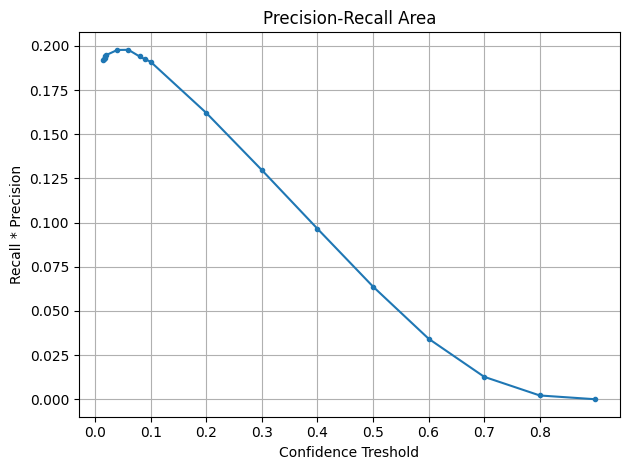

In [5]:

index, product = [i * 0.1 for i in range(10)], [x[1][1] * x[1][0] for x in pr_]

plt.figure()
plt.plot(threshs, product, marker='o', markersize = 3)
plt.xlabel("Confidence Treshold")
plt.ylabel("Recall * Precision")
plt.title("Precision-Recall Area")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(0, 0.9, step = 0.1))
plt.show()

# Training Losses

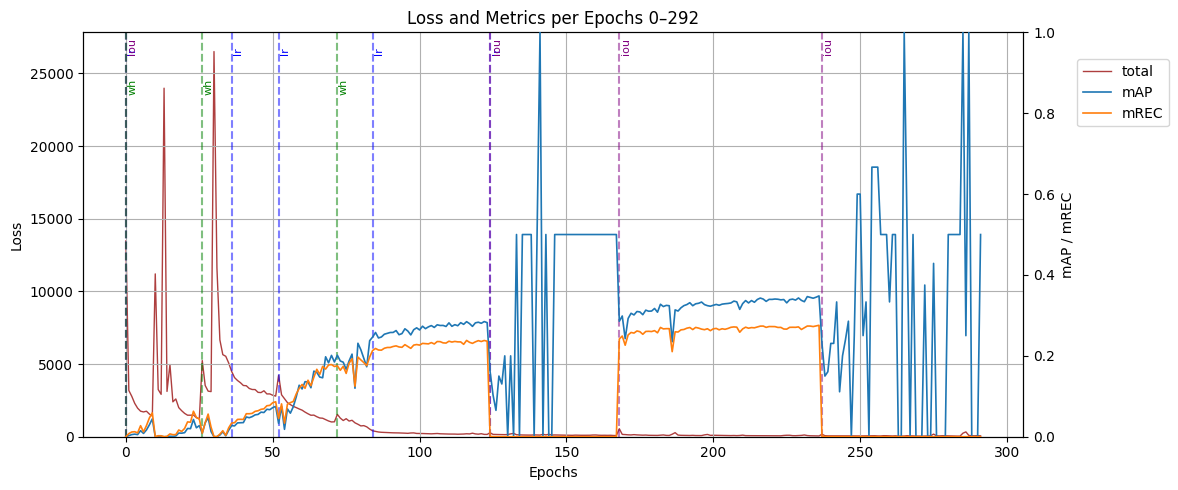

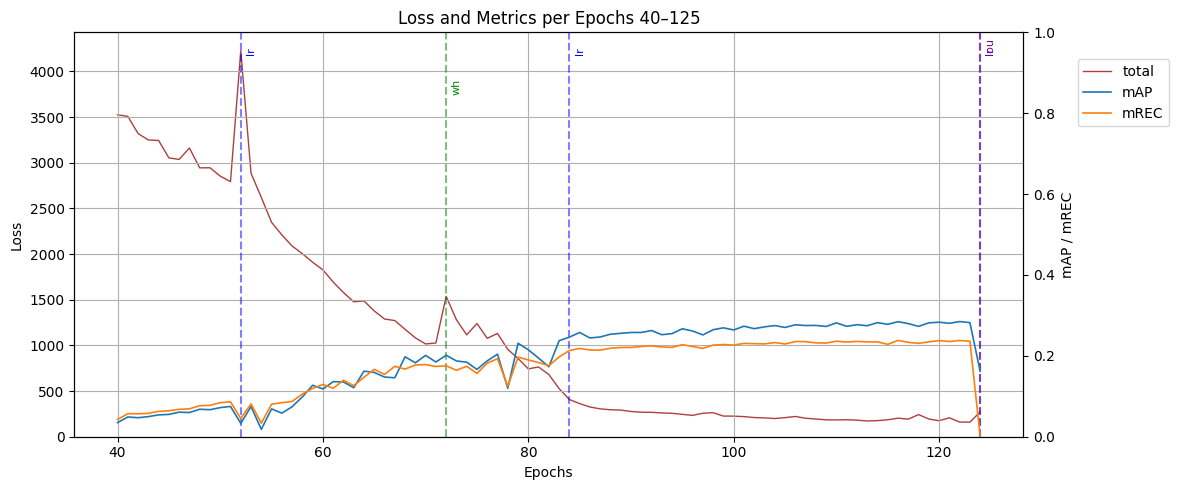

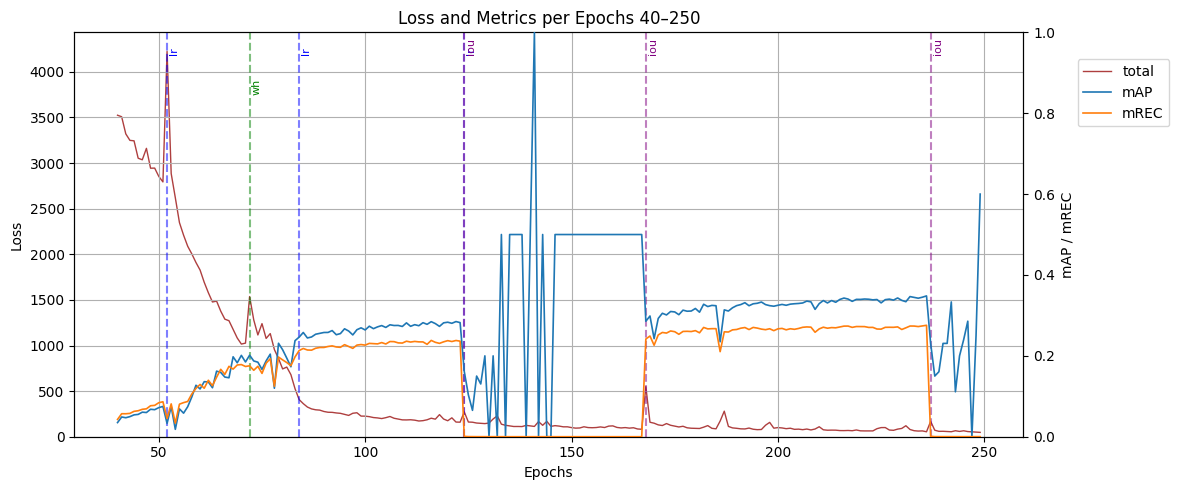

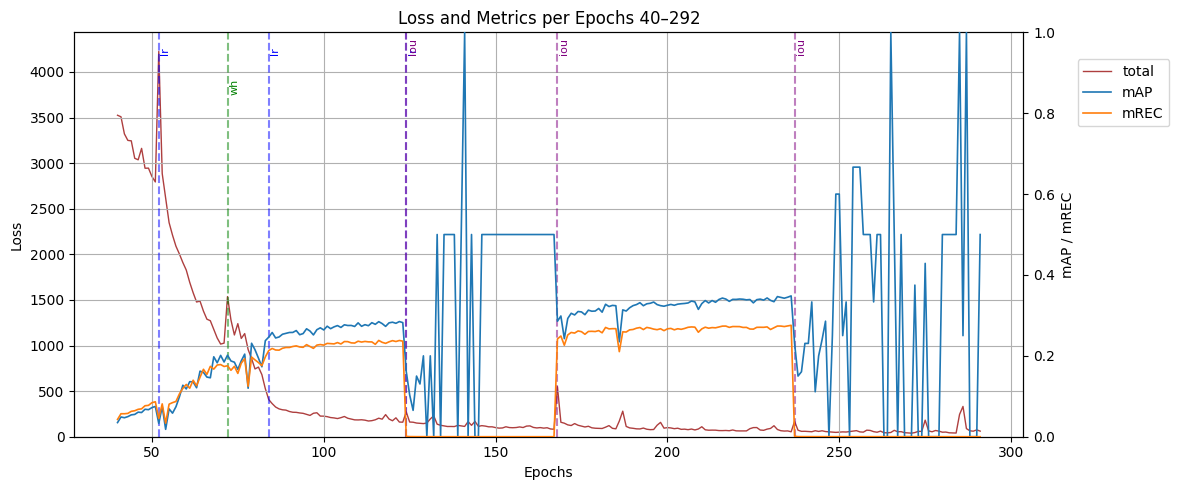

In [6]:
records = series.records.iloc[:]
intervals = [(0, 300), (40, 125), (40, 250), (40, 300)]
labels = "l_cls, l_noobj, l_xy, l_obj, l_wh, mAP, mREC".split(", ") 
losses = [records[k] for k in labels] 
epochs = list(range(len(losses[0])))

records["total"] = (
    records["l_cls"]
  + records["l_noobj"]
  + records["l_xy"]
  + records["l_obj"]
  + records["l_wh"]
)

# update labels + losses
labels.append("total")
losses.append(records["total"])

for (start, end) in intervals:
   util.plotTraining(start, end, "total", True, True, losses, labels, records, epochs)
